In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'C:/Users/Hp/Downloads/CroppedYale'
data_dir

'C:/Users/Hp/Downloads/CroppedYale'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Hp/Downloads/CroppedYale')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E+45.jpg'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E+90.jpg'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E-20.jpg'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E-35.jpg'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+005E+10.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2449


In [6]:
yaleB01 = list(data_dir.glob('yaleB01/*'))
yaleB01[:5]

[WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/DEADJOE'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/WS_FTP.LOG'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00.info'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E+45.jpg'),
 WindowsPath('C:/Users/Hp/Downloads/CroppedYale/yaleB01/yaleB01_P00A+000E+90.jpg')]

In [7]:
images_dict = {
               'yaleB01' :list(data_dir.glob('yaleB01/*')) , 
               'yaleB02' :list(data_dir.glob('yaleB02/*')) , 
               'yaleB03' :list(data_dir.glob('yaleB03/*')) , 
               'yaleB04' :list(data_dir.glob('yaleB04/*')) , 
               'yaleB05' :list(data_dir.glob('yaleB05/*')) , 
               'yaleB06' :list(data_dir.glob('yaleB06/*')) , 
               'yaleB07' :list(data_dir.glob('yaleB07/*')) , 
               'yaleB08' :list(data_dir.glob('yaleB08/*')) , 
               'yaleB09' :list(data_dir.glob('yaleB09/*')) , 
               'yaleB10' :list(data_dir.glob('yaleB10/*')) , 
               'yaleB11' :list(data_dir.glob('yaleB11/*')), 
               'yaleB12' :list(data_dir.glob('yaleB12/*')), 
               'yaleB13' :list(data_dir.glob('yaleB13/*')), 
               'yaleB15' :list(data_dir.glob('yaleB15/*')), 
               'yaleB16' :list(data_dir.glob('yaleB16/*')), 
               'yaleB17' :list(data_dir.glob('yaleB17/*')), 
               'yaleB18' :list(data_dir.glob('yaleB18/*')), 
               'yaleB19' :list(data_dir.glob('yaleB19/*')), 
               'yaleB20' :list(data_dir.glob('yaleB20/*')), 
               'yaleB21' :list(data_dir.glob('yaleB21/*')), 
               'yaleB22' :list(data_dir.glob('yaleB22/*')), 
               'yaleB23' :list(data_dir.glob('yaleB23/*')), 
               'yaleB24' :list(data_dir.glob('yaleB24/*')), 
               'yaleB25' :list(data_dir.glob('yaleB25/*')), 
               'yaleB26' :list(data_dir.glob('yaleB26/*')), 
               'yaleB27' :list(data_dir.glob('yaleB27/*')), 
               'yaleB28' :list(data_dir.glob('yaleB28/*')), 
               'yaleB29' :list(data_dir.glob('yaleB29/*')), 
               'yaleB30' :list(data_dir.glob('yaleB30/*')), 
               'yaleB31' :list(data_dir.glob('yaleB31/*')), 
               'yaleB32' :list(data_dir.glob('yaleB32/*')), 
               'yaleB33' :list(data_dir.glob('yaleB33/*')), 
               'yaleB34' :list(data_dir.glob('yaleB34/*')), 
               'yaleB35' :list(data_dir.glob('yaleB35/*')), 
               'yaleB36' :list(data_dir.glob('yaleB36/*')), 
               'yaleB37' :list(data_dir.glob('yaleB37/*')), 
               'yaleB38' :list(data_dir.glob('yaleB38/*')),
               'yaleB39' :list(data_dir.glob('yaleB39/*')),
}

In [8]:
Data_labels = {'yaleB01' :0 , 
               'yaleB02' :1 , 
               'yaleB03' :2 , 
               'yaleB04' :3 , 
               'yaleB05' :4 , 
               'yaleB06' :5 , 
               'yaleB07' :6 , 
               'yaleB08' :7 , 
               'yaleB09' :8 , 
               'yaleB10' :9 , 
               'yaleB11' :10, 
               'yaleB12' :11, 
               'yaleB13' :12, 
               'yaleB15' :13, 
               'yaleB16' :14, 
               'yaleB17' :15, 
               'yaleB18' :16, 
               'yaleB19' :17, 
               'yaleB20' :18, 
               'yaleB21' :19, 
               'yaleB22' :20, 
               'yaleB23' :21, 
               'yaleB24' :22, 
               'yaleB25' :23, 
               'yaleB26' :24, 
               'yaleB27' :25, 
               'yaleB28' :26, 
               'yaleB29' :27, 
               'yaleB30' :28, 
               'yaleB31' :29, 
               'yaleB32' :30, 
               'yaleB33' :31, 
               'yaleB34' :32, 
               'yaleB35' :33, 
               'yaleB36' :34, 
               'yaleB37' :35, 
               'yaleB38' :36,
               'yaleB39' :37,
               
               
               
    
}

In [9]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2


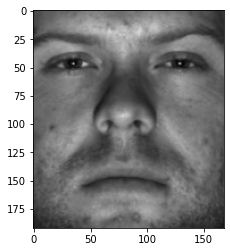

In [111]:
img = cv2.imread(str(images_dict['yaleB01'][5]))
plt.imshow(img)

In [112]:
img.shape

(192, 168, 3)

In [113]:
cv2.resize(img,(200,200)).shape

(200, 200, 3)

In [165]:
data = []   #data


def make_data():
    for Data_label in Data_labels:
        path = os.path.join(data_dir ,Data_label )
        label = Data_label.index(Data_label)
        
        
        
        for img_name in os.listdir(path):
            imge_path = os.path.join(path ,img_name )
            image = cv2.imread(imge_path)
            
            
            try:
                image = cv2.resize(image , (192 ,168))
                image = np.array(image , dtype =np.float32)
                data.append([image , label])
                
            except Exception as e:
                pass
    print(len(data))  
    #pik = open('data.pickle', 'wb')
    #pickle.dump(data,pick)
    #pick.close()
    
            
        
make_data()





2449


In [166]:
def load_data():
    np.random.shuffle(data)
    feature =[]
    labels =[]
    
    
    for img , label in data:
        feature.append(img)
        labels.append(label)
    feature = np.array(feature , dtype = np.float32)
    labels =   np.array(labels)
    
    feature = feature/255.0
    
    
    return [feature , labels]
    
    

In [116]:
feature = np.array(feature)
labels = np.array(labels)
print(feature.shape)
print(labels.shape)


(2449, 168, 192, 3)
(2449,)


In [117]:
from sklearn.model_selection import train_test_split
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import scipy.io as sio
import pickle
import seaborn as sns

import tensorflow as tf
 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.layers import Conv2D, MaxPool2D
import os,sys
import glob
from time import time

In [118]:
(feature , labels) = load_data()

x_train, x_test, y_train, y_test = train_test_split(feature ,labels, test_size = 0.2 , random_state = 20)


In [125]:
X_train_scaled = x_train / 255
X_test_scaled = x_test / 255

In [154]:
num_classes = 38

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1)              

62/62 [==============================] - 26s 418ms/step - loss: 0.2903 - accuracy: 0.9837


In [155]:
model.evaluate(X_test_scaled,y_test)


16/16 [==============================] - 2s 99ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [158]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(168, 
                                                              192,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [162]:
num_classes = 38

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=1)

62/62 [==============================] - 34s 534ms/step - loss: 0.2312 - accuracy: 0.9842


In [163]:
model.evaluate(X_test_scaled,y_test)


16/16 [==============================] - 2s 93ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
# another model 

In [131]:
num_classes = 38
input_shape = (168, 192, 3)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 168, 192, 32)      896       
                                                                 
 conv2d_101 (Conv2D)         (None, 168, 192, 32)      9248      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 84, 96, 32)       0         
 g2D)                                                            
                                                                 
 dropout_48 (Dropout)        (None, 84, 96, 32)        0         
                                                                 
 conv2d_102 (Conv2D)         (None, 84, 96, 64)        18496     
                                                                 
 conv2d_103 (Conv2D)         (None, 84, 96, 64)        36928     
                                                     

In [132]:
model.fit(X_train_scaled, y_train, epochs=1)              

E:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


62/62 [==============================] - 147s 2s/step - loss: 0.1320 - accuracy: 0.9837


In [145]:
model.evaluate(X_test_scaled,y_test)


16/16 [==============================] - 5s 340ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [146]:
predictions = model.predict(X_test_scaled)
predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [148]:
score = tf.nn.softmax(predictions[0])

np.argmax(score)

0

In [149]:
y_test[0]


0

In [134]:
#data augmentation 

from keras.preprocessing.image import ImageDataGenerator


In [135]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train_scaled)

In [142]:
num_classes = 38
input_shape = (168, 192, 3)

datagen,
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (None, 168, 192, 32)      896       
                                                                 
 conv2d_109 (Conv2D)         (None, 168, 192, 32)      9248      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 84, 96, 32)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 84, 96, 32)        0         
                                                                 
 conv2d_110 (Conv2D)         (None, 84, 96, 64)        18496     
                                                                 
 conv2d_111 (Conv2D)         (None, 84, 96, 64)        36928     
                                                     

In [143]:
model.fit(X_train_scaled, y_train, epochs=1)              


62/62 [==============================] - 144s 2s/step - loss: 0.1177 - accuracy: 0.9842


In [144]:
model.evaluate(X_test_scaled,y_test)


16/16 [==============================] - 7s 402ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions